# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [92]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [93]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(f'{url}appid={weather_api_key}&units={units}&q={city}')
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mar del plata
Processing Record 2 of Set 1 | waddan
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | bairiki
Processing Record 8 of Set 1 | hobyo
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | kawalu
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | burhar
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | sioux lookout
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | rikitea
Processing

In [123]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [122]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mar del plata,-38.0023,-57.5575,20.46,56,0,3.60,AR,1680369129
1,waddan,29.1614,16.1390,25.65,9,0,2.34,LY,1680369129
2,san patricio,28.0170,-97.5169,28.98,57,97,3.25,US,1680369129
3,albany,42.6001,-73.9662,18.65,79,86,2.24,US,1680368994
4,hermanus,-34.4187,19.2345,19.33,73,0,7.14,ZA,1680369129


In [139]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [140]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mar del plata,-38.0023,-57.5575,20.46,56,0,3.60,AR,1680369129
1,waddan,29.1614,16.1390,25.65,9,0,2.34,LY,1680369129
2,san patricio,28.0170,-97.5169,28.98,57,97,3.25,US,1680369129
3,albany,42.6001,-73.9662,18.65,79,86,2.24,US,1680368994
4,hermanus,-34.4187,19.2345,19.33,73,0,7.14,ZA,1680369129


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

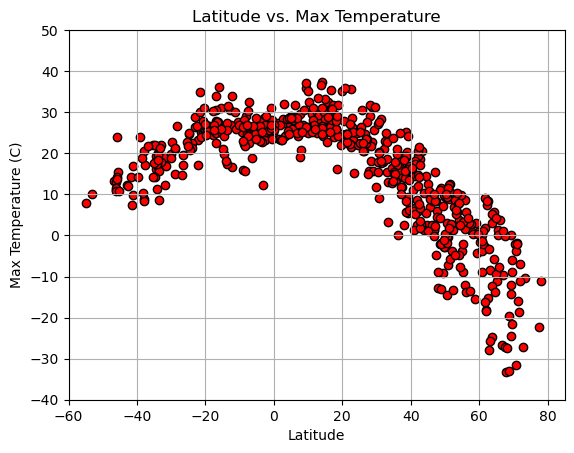

In [124]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Max Temp"], marker="o", facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.xlim(-60,85)
plt.ylim(-40,50)


# Save the figure
plt.savefig("../output_data/Fig1_Lat_vs_MaxTemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

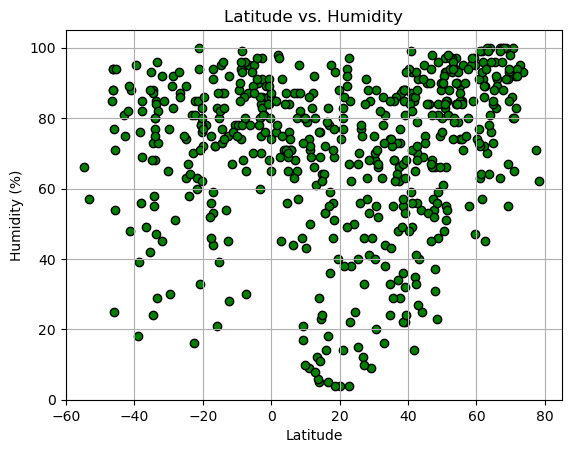

In [125]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Humidity"], marker="o", facecolors="green", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.xlim(-60,85)
plt.ylim(0,105)

# Save the figure
plt.savefig("../output_data/Fig2_Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

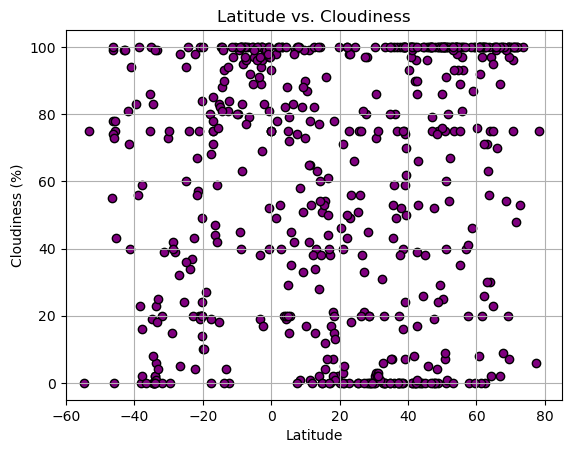

In [126]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Cloudiness"], marker="o", facecolors="purple", edgecolors="black")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.xlim(-60,85)
plt.ylim(-5,105)

# Save the figure
plt.savefig("../output_data/Fig3_Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

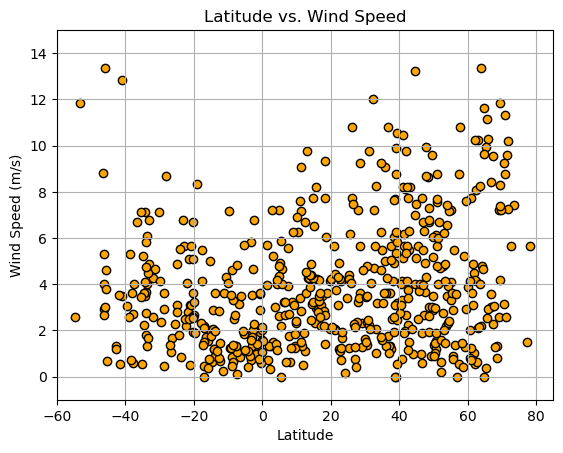

In [127]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Wind Speed"], marker="o", facecolors="orange", edgecolors="black")


# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.xlim(-60,85)
plt.ylim(-1,15)

# Save the figure
plt.savefig("../output_data/Fig4_Lat_vs_WindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [128]:
# Define a function to create Linear Regression plots
def regression_function(x_label, x_values, y_label, y_values, text_coordinates,):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r-")

    plt.annotate(line_eq, text_coordinates,fontsize=14,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")

In [129]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,waddan,29.1614,16.1390,25.65,9,0,2.34,LY,1680369129
2,san patricio,28.0170,-97.5169,28.98,57,97,3.25,US,1680369129
3,albany,42.6001,-73.9662,18.65,79,86,2.24,US,1680368994
5,bairiki,1.3292,172.9752,27.30,76,49,5.69,KI,1680369129
6,hobyo,5.3505,48.5268,28.84,76,79,5.85,SO,1680369129


In [130]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.0023,-57.5575,20.46,56,0,3.60,AR,1680369129
4,hermanus,-34.4187,19.2345,19.33,73,0,7.14,ZA,1680369129
7,vaini,-21.2000,-175.2000,25.09,94,20,3.09,TO,1680369130
10,kawalu,-7.3817,108.2082,22.56,95,100,0.10,ID,1680369130
16,ushuaia,-54.8000,-68.3000,7.81,66,0,2.57,AR,1680368874


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.87340963621985


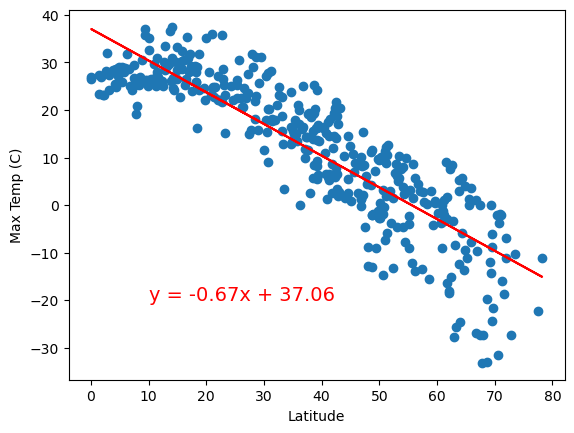

In [131]:
# Linear regression on Northern Hemisphere
regression_function("Latitude", northern_hemi_df["Lat"], "Max Temp (C)", northern_hemi_df["Max Temp"], (10, -20))

The r-value is: 0.6811450375572711


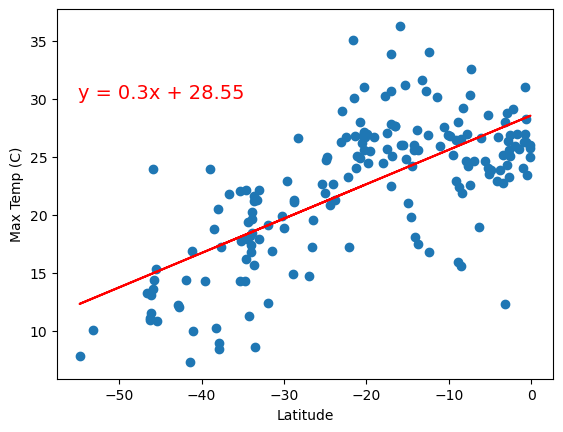

In [132]:
# Linear regression on Southern Hemisphere
regression_function("Latitude", southern_hemi_df["Lat"], "Max Temp (C)", southern_hemi_df["Max Temp"], (-55, 30))

**Discussion about the linear relationship:** The northern hemisphere has an r-value of -.873 which signifies a strong negative correlation between Latitude and Max Temp. As the latitude increases, the Max Temp decreases. The southern hemisphere has a slightly weaker r value of .681, but still has a relatively strong postive correlation between latitude and max temp. As the latitude increases, the max temp increases. The max temperature seems to be highest around the equator (0 latitude) and lowest around the north and south poles(-90 and 90 latitude).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3489123062073324


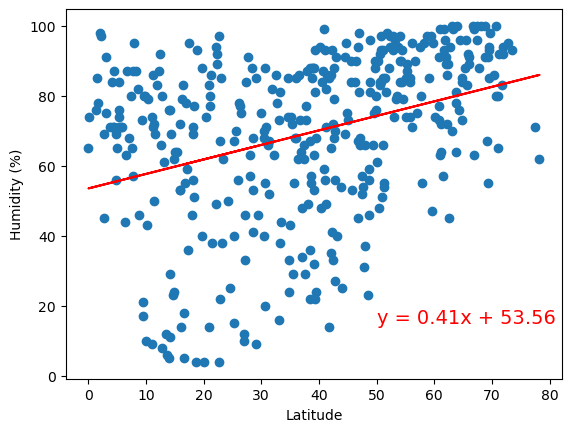

In [133]:
# Northern Hemisphere
regression_function("Latitude", northern_hemi_df["Lat"], "Humidity (%)", northern_hemi_df["Humidity"], (50, 15))

The r-value is: 0.21969413124662562


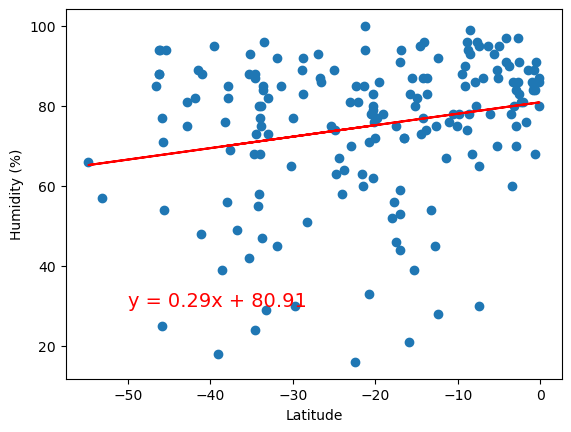

In [134]:
# Southern Hemisphere
regression_function("Latitude", southern_hemi_df["Lat"], "Humidity (%)", southern_hemi_df["Humidity"], (-50, 30))

**Discussion about the linear relationship:** Both r-values for the northern and southern hemispher are relatively low at .348 and .219 respectively. This indicates not much of a correlation between latitude and humidity. However, one observation I had was that there seems to be more of a skew towards postive correlation for both hemispheres. Also it appears that the northern hemisphere may have more cities with humidities on the higher side closer to 100%.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22622575517027121


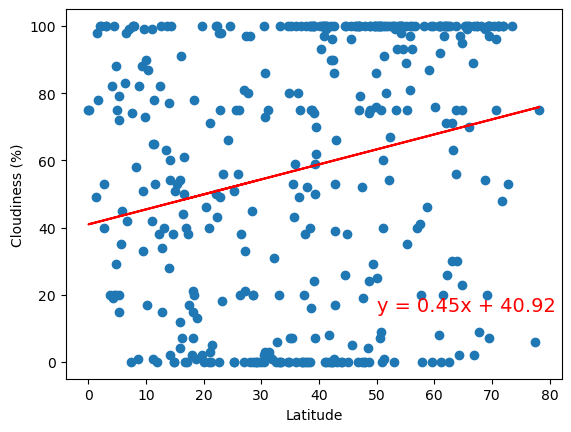

In [135]:
# Northern Hemisphere
regression_function("Latitude", northern_hemi_df["Lat"], "Cloudiness (%)", northern_hemi_df["Cloudiness"], (50, 15))

The r-value is: 0.39390769094934874


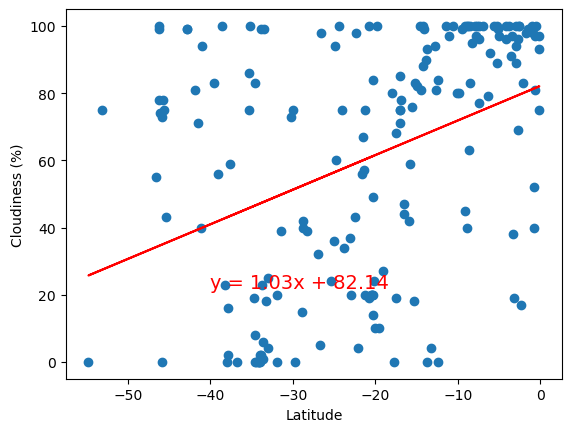

In [136]:
# Southern Hemisphere
regression_function("Latitude", southern_hemi_df["Lat"], "Cloudiness (%)", southern_hemi_df["Cloudiness"], (-40, 22))

**Discussion about the linear relationship:** Although the r-values are a bit average, there appears to be positive correlation for both hemispheres between latitude and cloudiness %. We could presume that the more north we go, the more potential cloudiness there will be.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.20344099855148862


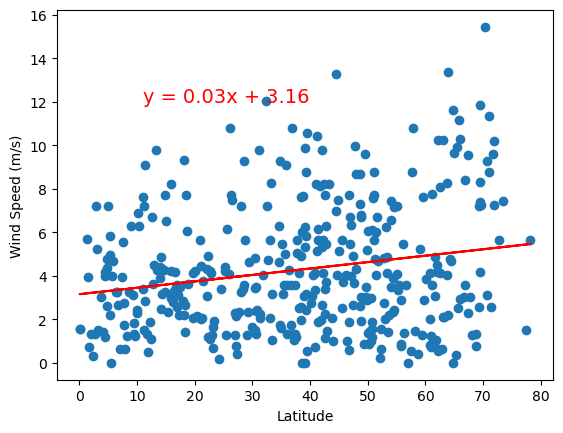

In [137]:
# Northern Hemisphere
regression_function("Latitude", northern_hemi_df["Lat"], "Wind Speed (m/s)", northern_hemi_df["Wind Speed"], (11, 12))

The r-value is: -0.38122619005978825


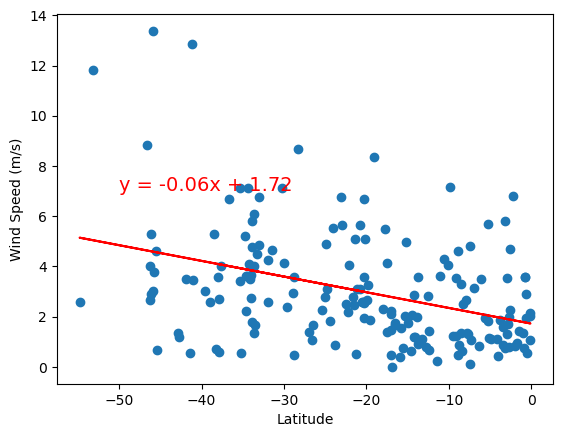

In [138]:
# Southern Hemisphere
regression_function("Latitude", southern_hemi_df["Lat"], "Wind Speed (m/s)", southern_hemi_df["Wind Speed"], (-50, 7))

**Discussion about the linear relationship:** The r-values for latitude vs Wind Speed are relatively low but display an interesting observation in that the closer we get to the equator (0 latitude), the less wind speed there is. The northern hemipsher has a postive correlation between latitude and wind speed while the southern hemispher has a negative correlation.